# ตัวอย่าง การทำ Cluster Analysis


ทำการเชื่อม Google Drive

In [1]:
# from google.colab import drive 

# drive.mount('/content/gdrive')

ระบุ Folder ใน Drive ที่ต้องการใช้

In [2]:
import os
os.chdir("/Users/phutharesuanwachirapisut/Programming/Dataset")


อ่านข้อมูลจากไฟล์

In [3]:
# import pandas
import pandas as pd

# load the file using the read_excel() function
dataset = pd.read_csv('StudentScore.csv')

# show the first few records
dataset.head()

,Name,Mark,Attended
0,Alex Krausche,1.325,12.500000
1,Avid Morvita,3.100,11.333333
2,Frank Fester,2.200,11.600000
3,Mariano Selina,1.680,6.200000
4,Michaela Martke,3.660,7.400000


ระบุข้อมูลที่ทำหน้าที่เป็น Features 

In [4]:
X = dataset[['Mark', 'Attended']] 
X # unsupervice -> ไม่มี y ที่เป็น class

,Mark,Attended
0,1.325000,12.500000
1,3.100000,11.333333
2,2.200000,11.600000
3,1.680000,6.200000
4,3.660000,7.400000
5,2.260000,11.800000
6,2.800000,8.333333
7,2.433333,12.000000
8,1.666667,12.000000
9,4.400000,8.600000


**K-means Clustering**

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4) # เป็นการสุ่ม centroid
model.fit(X)


KMeans(n_clusters=4)

การทำนายผลจากโมเดลที่สร้างขึ้น

In [6]:
cluster_ids = model.predict(X)
print(cluster_ids)

[1 3 3 2 2 3 2 3 1 0]


พิมพ์กราฟแสดงความสัมพันธ์ของข้อมูล

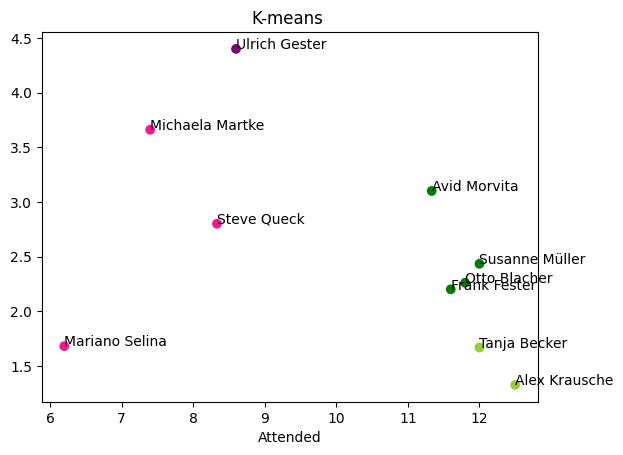

In [7]:
import matplotlib.pyplot as plt
# Create a colormap
import numpy as np
colormap = np.array(['purple', 'yellowgreen', 'deeppink','green'])
# plot the data cluster
plt.scatter(dataset['Attended'], # แกน x
             dataset['Mark'], # แกน y
             c=colormap[cluster_ids]) # ทำให้ตัวแต่ละ cruster มีสีตรงกัน

# annotate each data point with its product and cluster id
for index,  Name,  Mark, Attended in dataset.itertuples():
    plt.annotate(Name,(Attended, Mark)) # ใส่ชื่อจุด
plt.title('K-means ')
plt.xlabel('Attended')

plt.show()

**Hierachical Clustering**

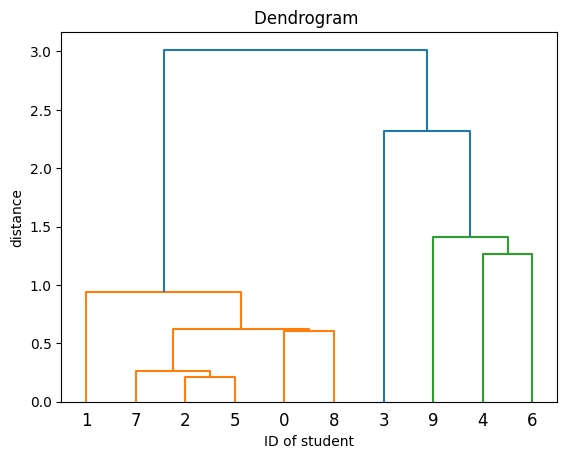

In [8]:
# import linkage and dendrogram from scipy
from scipy.cluster.hierarchy import dendrogram, linkage

plt.title('Dendrogram ')
plt.xlabel('ID of student')
plt.ylabel('distance')
    
# create the clustering
Z = linkage(dataset[['Mark', 'Attended']]) # centroid linkage
    
# plot the dendrogram
dendrogram(Z)
# show the plots
plt.show()

In [9]:
# import fcluster
from scipy.cluster.hierarchy import fcluster
cluster_ids2 = fcluster(Z, 4, criterion='maxclust')

In [10]:
print(cluster_ids2)

[1 1 1 4 2 1 2 1 1 3]


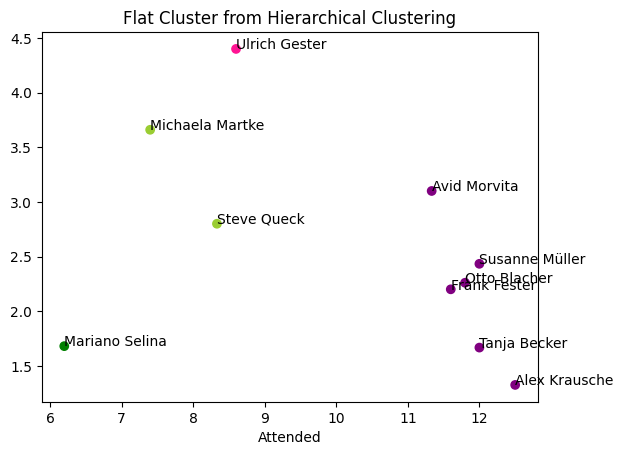

In [11]:
plt.scatter(dataset['Attended'], dataset['Mark'],c=colormap[cluster_ids2-1])

# annotate each data point with its product and cluster id
for index,  Name,  Mark, Attended in dataset.itertuples(): 
    plt.annotate(Name,(Attended, Mark))                     # ใส่ขื่อจุด
plt.title('Flat Cluster from Hierarchical Clustering')
plt.xlabel('Attended')
plt.show()